# Bell state and GHZ state

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import string
# import time
# import datetime

from braket.circuits import Circuit, Gate, Instruction, circuit
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

In [2]:
ghz_2 = Circuit().h(0).cnot(0, 1) # bell state
ghz_4 = Circuit().h(0).cnot(0, 1).cnot(0, 2).cnot(0, 3)

## Simulator

In [3]:
device = LocalSimulator()
counts_2 = device.run(ghz_2, shots=100).result().measurement_counts
counts_4 = device.run(ghz_4, shots=500).result().measurement_counts
print(counts_2)
print(counts_4)

Counter({'11': 55, '00': 45})
Counter({'0000': 254, '1111': 246})


## Hardware

In [4]:
import boto3
from braket.aws import AwsSession, AwsDevice

region_name = "eu-west-2"
endpoint_url = "https://5sk8cnl96i.execute-api.eu-west-2.amazonaws.com/Prod"
braket_client = boto3.client("braket", region_name=region_name, endpoint_url=endpoint_url)
aws_session = AwsSession(braket_client=braket_client)

In [5]:
my_bucket = "amazon-braket-hardware-testing" # the name of the bucket
my_prefix = "ghz-states" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

device_arn = "arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy"
# device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"
device = AwsDevice(device_arn, aws_session=aws_session)

In [6]:
# task = AwsQuantumTask.create(aws_session, device_arn, ghz_2, s3_folder, shots=100)
task = device.run(ghz_2, shots=100)
counts_hw2 = task.result().measurement_counts
# print(task.result())
print(counts_hw2)

Counter({'11': 42, '00': 28, '01': 22, '10': 8})


In [7]:
# task = AwsQuantumTask.create(aws_session, device_arn, ghz_4, s3_folder, shots=500)
task = device.run(ghz_4, shots=100)
counts_hw4 = task.result().measurement_counts
# print(task.result())
print(counts_hw4)

Task is in terminal state FAILED and no result is available.
Task failure reason is: "Pulse channel with id 'Q2.cross_resonance' not found on device 'Q0'.".


AttributeError: 'NoneType' object has no attribute 'measurement_counts'

## See results

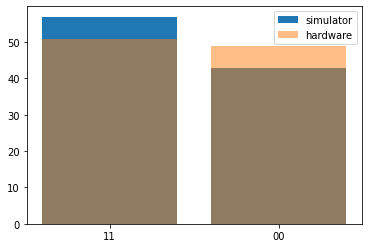

In [16]:
plt.bar(counts_2.keys(), counts_2.values())
plt.bar(counts_hw2.keys(), counts_hw2.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

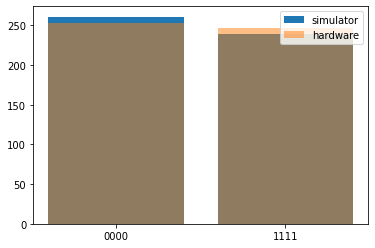

In [17]:
plt.bar(counts_4.keys(), counts_4.values())
plt.bar(counts_hw4.keys(), counts_hw4.values(), alpha=0.5)
plt.legend(['simulator','hardware'])